In [2]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Read in redfin csv sample
redfin_sample=pd.read_csv("data/redfin/redfin_77002.csv")
redfin_sample

FileNotFoundError: [Errno 2] No such file or directory: 'data/redfin/redfin_77002.csv'

In [ ]:
# filter only SOLD data
redfin_sold=redfin_sample[redfin_sample['SALE TYPE']=="PAST SALE"]
redfin_sold.columns

In [ ]:
redfin_sold_group_by_type=redfin_sold.groupby('PROPERTY TYPE')
redfin_sold_group_by_type.describe()

In [8]:
test=pd.read_html("https://web.har.com/zipcode")

In [9]:
test[0]

,0
0,Zip Code Profile The list below consists of z...


In [10]:
test[1]

,0
0,Zip Code Profile
1,The list below consists of zip codes residing ...


In [11]:
test[2]

,0,1,2,3
0,Zip Code,City (City Alias Name(s)),County,NaN
1,77002,"Houston - Inner Loop (HOUSTON,CLUTCH CITY,)",HARRIS,"77002 Details, Real Estate, Subdivisions and M..."
2,77003,"Houston - Inner Loop (HOUSTON,)",HARRIS,"77003 Details, Real Estate, Subdivisions and M..."
3,77004,"Houston - Inner Loop (HOUSTON,)",HARRIS,"77004 Details, Real Estate, Subdivisions and M..."
4,77005,"Houston - Inner Loop (HOUSTON,SOUTHSIDE PLACE,...",HARRIS,"77005 Details, Real Estate, Subdivisions and M..."
...,...,...,...,...
215,77591,TEXAS CITY,GALVESTON,"77591 Details, Real Estate, Subdivisions and M..."
216,77598,"WEBSTER (FONDREN,WEBSTER,)",HARRIS,"77598 Details, Real Estate, Subdivisions and M..."
217,77617,"GILCHRIST (CAPLEN,GILCHRIST,)",GALVESTON,"77617 Details, Real Estate, Subdivisions and M..."
218,77623,HIGH ISLAND,GALVESTON,"77623 Details, Real Estate, Subdivisions and M..."


In [12]:
col_names=test[2].loc[0,:]

In [13]:
zip_data=pd.DataFrame(test[2].loc[1:,:2])#, columns=['Zip Code','City/City Alias Name(s)','County'])
zip_data.columns

Int64Index([0, 1, 2], dtype='int64')

In [14]:
zip_data.columns=['Zip Code','City/City Alias Name(s)','County']
zip_data

,Zip Code,City/City Alias Name(s),County
1,77002,"Houston - Inner Loop (HOUSTON,CLUTCH CITY,)",HARRIS
2,77003,"Houston - Inner Loop (HOUSTON,)",HARRIS
3,77004,"Houston - Inner Loop (HOUSTON,)",HARRIS
4,77005,"Houston - Inner Loop (HOUSTON,SOUTHSIDE PLACE,...",HARRIS
5,77006,"Houston - Inner Loop (HOUSTON,)",HARRIS
...,...,...,...
215,77591,TEXAS CITY,GALVESTON
216,77598,"WEBSTER (FONDREN,WEBSTER,)",HARRIS
217,77617,"GILCHRIST (CAPLEN,GILCHRIST,)",GALVESTON
218,77623,HIGH ISLAND,GALVESTON


In [26]:
zip_data_harris=zip_data[zip_data['County']=="HARRIS"]
print("Harris" + str(zip_data_harris.shape))

zip_data_houston=zip_data[zip_data['City/City Alias Name(s)'].str.contains("ouston")]
print("Harris/Houston" + str(zip_data_houston.shape))
zip_data_houston['Zip Code'][1]

Harris(133, 3)
Harris/Houston(96, 3)


'77002'

In [19]:
import webbrowser as web
import time
import keyboard
import os

# i=0
# Apparent scaling factor to convert Redfin regionid to postal Zip code
regionid_scaling=43879

# cycle through all Zip codes in Harris county
for my_zip in zip_data_houston['Zip Code']:
        regionid=int(my_zip) - int(regionid_scaling)
        print(f"| {str(my_zip)} | {str(regionid)} | ")
        web.open("https://www.redfin.com/zipcode/"+my_zip + "/filter/include=sold-5yr")
        url=f"https://www.redfin.com/stingray/api/gis-csv?al=1&market=houston&min_stories=1&num_homes=350&ord=redfin-recommended-asc&page_number=1&region_id={str(regionid)}&region_type=2&sold_within_days=1825&status=9&uipt=1,2,3,4,5,6,7,8&v=8"
        web.open(url)
        
        time.sleep(5)
        
        os.system(f"mv data/redfin/redfin_2021*.csv data/redfin/redfin_{str(my_zip)}.csv")
        time.sleep(3)
        
        keyboard.press_and_release('ctrl+w') # closes the last tab
        
        regionid+=1
#         i+=1
#         if i>5:
#             break
        

| 77002 | 33123 | 
| 77003 | 33124 | 
| 77004 | 33125 | 
| 77005 | 33126 | 
| 77006 | 33127 | 
| 77007 | 33128 | 
| 77008 | 33129 | 
| 77009 | 33130 | 
| 77010 | 33131 | 
| 77011 | 33132 | 
| 77012 | 33133 | 
| 77013 | 33134 | 
| 77014 | 33135 | 
| 77015 | 33136 | 
| 77016 | 33137 | 
| 77017 | 33138 | 
| 77018 | 33139 | 
| 77019 | 33140 | 
| 77020 | 33141 | 
| 77021 | 33142 | 
| 77022 | 33143 | 
| 77023 | 33144 | 
| 77024 | 33145 | 
| 77025 | 33146 | 
| 77026 | 33147 | 
| 77027 | 33148 | 
| 77028 | 33149 | 
| 77029 | 33150 | 
| 77030 | 33151 | 
| 77031 | 33152 | 
| 77032 | 33153 | 
| 77033 | 33154 | 
| 77034 | 33155 | 
| 77035 | 33156 | 
| 77036 | 33157 | 
| 77037 | 33158 | 
| 77038 | 33159 | 
| 77039 | 33160 | 
| 77040 | 33161 | 
| 77041 | 33162 | 
| 77042 | 33163 | 
| 77043 | 33164 | 
| 77044 | 33165 | 
| 77045 | 33166 | 
| 77046 | 33167 | 
| 77047 | 33168 | 
| 77048 | 33169 | 
| 77049 | 33170 | 


KeyboardInterrupt: 

In [55]:
import pandas as pd
import glob

path = 'data/redfin/' 
all_files = glob.glob(path + "redfin_7*.csv")

redfin_data = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    redfin_data.append(df)

redfin_data_all = pd.concat(redfin_data, axis=0, ignore_index=True)
redfin_data_all.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [48]:
redfin_data_all['ZIP OR POSTAL CODE'].unique()

array(['77019', '77002', '77018', '77002-6916', '77004', '77006', 77003,
       77011, 77004, 77002, 77044, 77005, 77025, 77030, 77098, 77006,
       77019, 77007, 77008, 77471, 77055, 77009, 77010, 77023, 77012,
       77087, 77013, 77014, 77015, 77016, 77028, 77039, 77017, 77061,
       77071, 77018, 77022, 77091, 77020, 77021, 77076, 77093, 77038,
       77024, 77079, 77406, 77054, 75147, 77026, 77027, 77095, 77078,
       77029, 77031, 77459, 77049, 77032, 77396, 77033, 77051, 77034,
       77504, 77035, 77096, 77036, 77037, 77073, 77060, 77086, 77309,
       77040, 77041], dtype=object)

<AxesSubplot:xlabel='DAYS ON MARKET', ylabel='YEAR BUILT'>

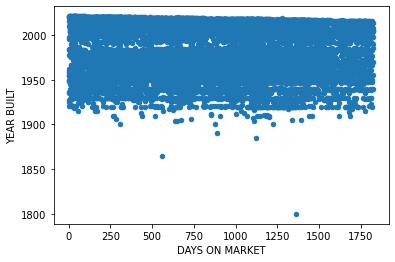

In [66]:
redfin_data_all.plot('DAYS ON MARKET','YEAR BUILT', kind='scatter')